# Sync Testing
Initial tests to create the core functions

In [26]:
from dtwinpylib.dtwinpy.Digital_Twin import Digital_Twin
from dtwinpylib.dtwinpy.interfaceDB import Database


import importlib
import dtwinpylib
importlib.reload(dtwinpylib.dtwinpy.Digital_Twin) #reload this specifc module to upadte the class
importlib.reload(dtwinpylib.dtwinpy.interfaceDB) #reload this specifc module to upadte the class


<module 'dtwinpylib.dtwinpy.interfaceDB' from 'c:\\Users\\pedro\\Github Repositories\\Digital_Twin\\Digital Twin\\dtwinpylib\\dtwinpy\\interfaceDB.py'>

## Sync Concept

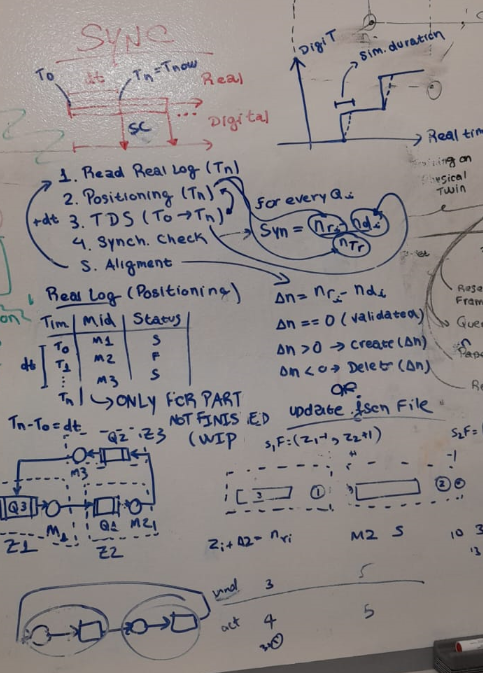

First we divide the machines and queues in zones. Each consist of one machine and one queue. The queue is the input queue of that machine. If a machine have multiple input queues, all of them are considered as being part of the same Zone. Notice that a zone is different than a cluster. Cluster is defined as a group of queue and machines that are parallel. Thus, a cluster can have multiple machine executing the same type operation and, because of that is expected to the component of cluster have the almost the same behaviour. For instance, a cluster can machines if similar distributions of process times, queue ins with the same capacity, and queues out of the same capacity.

### Steps 
The steps for running a sync is as follow:

1. Read real log
2. With the parts trace from the event log, run a Trace Driven Simulation (TDS). In this way, creating the Digital Log. 
3. From the Real Log apply the **positioning discovery**. This method will give the how many parts are in each zone.
4. From the Digital Log extract directly the number of parts in each zone.
5. Base od the results of 4. and 5., calculate the Sync Indicator for doing the SyncCheck. 
6. If the SyncCheck is not enough, update the positioning of parts of the digital model

- It's important to say that Sync considered that the simulation is starting from a point in the time where both system were aligned, so we know the initial conditions from the real log. 
- The output of the Sync is correct even if the system has some problem with Logic or Input, because basically we're just seeing were the parts are positioned and if it's not aligned, adjust it.

##### Positioning Discovery

This method works directly with the real log. To calculate the number of parts we use the following formula:

$$

\text{Nparts-Zi} = Z_i + \Delta_io 

$$

Where,

$Z_i$: Initial conditions (part occupation) in the Zone i

$\Delta_io = Z_{in} - Z_{out}$ : The difference between entering parts and leaving parts in a Zone

##### SyncCheck

In the SyncCheck we verify if there is any missaligment between real and digital queues. So for each queue of each Zone we calculate the Sync Inidcator:

$$
\text{SyncIndi} = \frac{Nreal_i - Ndigi_i}{Nreal_i}
$$

Where,

$Nreal_i$: The number of parts in the real system for Queue i

$Ndigi_i$: The number of parts in the digital system for Queue i

If the $SyncInd_i$ is lower than a thresh hold, the aligment should be done. 

##### Aligment

For the aligment we just need to take the values of $Nreal_i$ and update directly the $model.json$

## Implementation

Digital Twin model for 2-s stations

==========  Reading the Model: model_2stations_closed  ==========
===> Big Picture
Total number of Machines: 2
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [2, 1]
Capacity: 5
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Queue Lenght: 4

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 2
--Queue Out:--
Queue 1
---Process Time for quasi Trace Driven Simulation---
None
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
---Process Time for quasi Trace Driven Simulation---
None
### ============ Simulation Started ============ ###
Time: 0 - [Machine 1] got Part 1 from Queue 2 (capacity= 3)
T

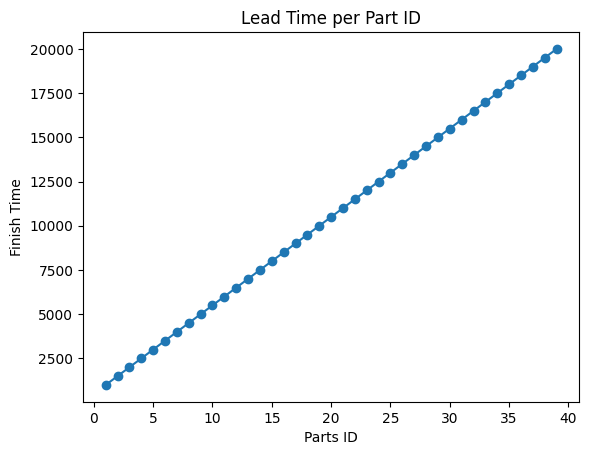

- Maximum Cycle Time: 2500
- Minimum Cycle Time: 1000
>>> Average system cycle time: 1974.3589743589744 [time unit]***


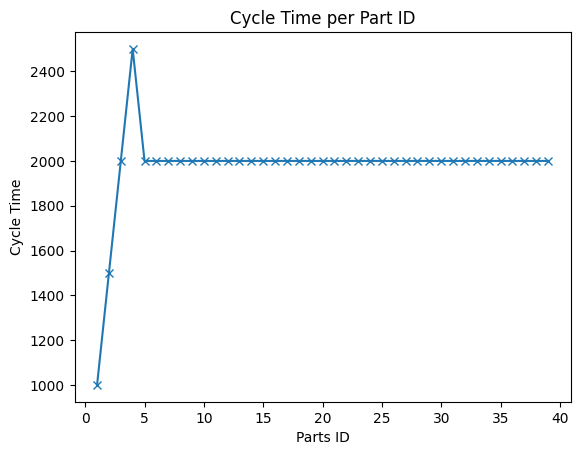

>>> System Throughput: 0.00195 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [16]:
digital_twin = Digital_Twin(name= "model_2stations_closed",until= 20001, initial=True )
digital_twin.run_digital_model()

Store digital model object

In [44]:
digital_model = digital_twin.generate_digital_model()

==========  Reading the Model: model_2stations_closed  ==========
===> Big Picture
Total number of Machines: 2
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [2, 1]
Capacity: 5
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Queue Lenght: 4

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 2
--Queue Out:--
Queue 1
---Process Time for quasi Trace Driven Simulation---
None
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
---Process Time for quasi Trace Driven Simulation---
None


Extract the digital components (machines, queues, etc)

In [45]:
(machines_vector, queues_vector) = digital_model.get_model_components()

Read the data from the Real Event Log

In [46]:
database = Database(database_path= "databases/digital_model_2stations_closed_db.db", event_table= "digital_log")
full_database = database.read_store_data_all("digital_log")
full_database

[(0, 'Machine 1', 'Started', 'Part 1', 'Queue 2'),
 (500, 'Machine 1', 'Finished', 'Part 1', 'Queue 1'),
 (500, 'Machine 1', 'Started', 'Part 2', 'Queue 2'),
 (500, 'Machine 2', 'Started', 'Part 1', 'Queue 1'),
 (1000, 'Machine 1', 'Finished', 'Part 2', 'Queue 1'),
 (1000, 'Machine 1', 'Started', 'Part 3', 'Queue 2'),
 (1000, 'Machine 2', 'Finished', 'Part 1', 'Queue 2'),
 (1000, 'Machine 2', 'Started', 'Part 2', 'Queue 1'),
 (1500, 'Machine 1', 'Finished', 'Part 3', 'Queue 1'),
 (1500, 'Machine 1', 'Started', 'Part 4', 'Queue 2'),
 (1500, 'Machine 2', 'Finished', 'Part 2', 'Queue 2'),
 (1500, 'Machine 2', 'Started', 'Part 3', 'Queue 1'),
 (2000, 'Machine 1', 'Finished', 'Part 4', 'Queue 1'),
 (2000, 'Machine 1', 'Started', 'Part 5', 'Queue 2'),
 (2000, 'Machine 2', 'Finished', 'Part 3', 'Queue 2'),
 (2000, 'Machine 2', 'Started', 'Part 4', 'Queue 1'),
 (2500, 'Machine 1', 'Finished', 'Part 5', 'Queue 1'),
 (2500, 'Machine 1', 'Started', 'Part 6', 'Queue 2'),
 (2500, 'Machine 2', 'Fini

Define the Zone object

In [47]:
class Zone():
    def __init__(self, machine, queue_list):
        self.name = "Zone of " + machine.get_name()
        self.machine = machine
        self.queue_list = queue_list
        #--- Counters for in and out number of parts
        self.inZone = 0
        self.outZone = 0
        self.Zone_initial = 0
        self.NumParts = 0

        #--- Initial Conditions
        # Multiple Queues
        if len(self.queue_list) > 1:
            ini_count = 0
            for queue in self.queue_list:
                ini_count += queue.get_len()
            self.Zone_initial = ini_count
        
        # Single Queue
        if len(self.queue_list) == 1:
            queue = self.queue_list[0]
            self.Zone_initial = queue.get_len()

    def addIn(self):
        self.inZone += 1
    def addOut(self):
        self.outZone += 1
    def calculate_parts(self):
        self.NumParts = (self.Zone_initial + self.inZone - self.outZone) 
        return  self.NumParts
    

    #--- Basic Sets and Gets
    def get_name(self):
        return self.name
    def get_queue_list(self):
        return self.queue_list

Create Zone objects based on the number of Machines

In [48]:
zones_dict = {}
for machine in machines_vector:
    #--- Basic information from the machine
    machine_name = machine.get_name()
    machine_queues_in_list = machine.get_queue_in()

    #--- create a temp Zone object
    new_zone = Zone(machine= machine, queue_list= machine_queues_in_list)

    #--- add the Zone object in the dictionary of zones
    zones_dict[machine_name] = new_zone

for key in zones_dict:
    print(f"{key}: {zones_dict[key].get_name()}")

Machine 1: Zone of Machine 1
Machine 2: Zone of Machine 2


In [32]:
for key in zones_dict:
    print(zones_dict[key])

Loop through the event log looking to add In or Out for the related Zone

In [49]:
for event in full_database:
    #--- Extract the important informations
    (machine_name, status, queue_name) = (event[1], event[2], event[4]) 
    
    # We just care about the events with status "Finished",
    # because this in the only moment when we subtract some part from the current
    # zone and add it to the next zone

    if status == "Finished":
        # For the current zone a part was finished, so we increment the Out
        current_zone = zones_dict[machine_name]
        current_zone.addOut()

        #--- Discovery in which zone the part was putted based on the queues and machines
        for key in zones_dict:
            #--- For every zone in the zone dictionary
            zone = zones_dict[key]

            #--- For every queue of a Zone
            for queue in zone.get_queue_list():

                #--- Found a zone if the selected next queue
                if queue.get_name() == queue_name:
                    next_zone = zone
                
        #--- For the next zone, increment the In since we're adding a part to that zone
        next_zone.addIn()


All the Zones are updated, run the calculations

In [50]:
for key in zones_dict:
    current_zone = zones_dict[key]
    zone_NumParts = current_zone.calculate_parts()
    print(f"[{current_zone.get_name()}] NumParts = {zone_NumParts}")
    

[Zone of Machine 1] NumParts = 3
[Zone of Machine 2] NumParts = 1


Check the Digital Model before simulation

In [51]:
digital_model.verbose()

==========  Reading the Model: model_2stations_closed  ==========
===> Big Picture
Total number of Machines: 2
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [2, 1]
Capacity: 5
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Queue Lenght: 4

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 2
--Queue Out:--
Queue 1
---Process Time for quasi Trace Driven Simulation---
None
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
---Process Time for quasi Trace Driven Simulation---
None


Run the digital model

In [52]:
digital_model.run()

### ============ Simulation Started ============ ###
Time: 0 - [Machine 1] got Part 1 from Queue 2 (capacity= 3)
Time: 500 - [Machine 1] put Part 1 in Queue 1 (capacity = 1)
Time: 500 - [Machine 1] got Part 2 from Queue 2 (capacity= 2)
Time: 500 - [Machine 2] got Part 1 from Queue 1 (capacity= 0)
Time: 1000 - [Machine 1] put Part 2 in Queue 1 (capacity = 1)
Time: 1000 - [Machine 1] got Part 3 from Queue 2 (capacity= 1)
Time: 1000 - [Terminator] xxx Part 1 terminated xxx
Time: 1000 - [Terminator] Part 5 replaced
Time: 1000 - [Machine 2] got Part 2 from Queue 1 (capacity= 0)
Time: 1500 - [Machine 1] put Part 3 in Queue 1 (capacity = 1)
Time: 1500 - [Machine 1] got Part 4 from Queue 2 (capacity= 1)
Time: 1500 - [Terminator] xxx Part 2 terminated xxx
Time: 1500 - [Terminator] Part 6 replaced
Time: 1500 - [Machine 2] got Part 3 from Queue 1 (capacity= 0)
Time: 2000 - [Machine 1] put Part 4 in Queue 1 (capacity = 1)
Time: 2000 - [Machine 1] got Part 5 from Queue 2 (capacity= 1)
Time: 2000 - 

Check Digital Model after simulation

In [53]:
digital_model.verbose()

==========  Reading the Model: model_2stations_closed  ==========
===> Big Picture
Total number of Machines: 2
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [2, 1]
Capacity: 5
Parts stored: Part 42
Part Processes for Trace Driven Simulation: None
Parts stored: Part 43
Part Processes for Trace Driven Simulation: None
Queue Lenght: 2

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 2
--Queue Out:--
Queue 1
---Process Time for quasi Trace Driven Simulation---
None
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
---Process Time for quasi Trace Driven Simulation---
None


## Running Everything

In [61]:
class Zone():
    def __init__(self, machine, queue_list):
        self.name = "Zone of " + machine.get_name()
        self.machine = machine
        self.queue_list = queue_list
        #--- Counters for in and out number of parts
        self.inZone = 0
        self.outZone = 0
        self.Zone_initial = 0
        self.NumParts = 0

        #--- Initial Conditions
        # Multiple Queues
        if len(self.queue_list) > 1:
            ini_count = 0
            for queue in self.queue_list:
                ini_count += queue.get_len()
            self.Zone_initial = ini_count
        
        # Single Queue
        if len(self.queue_list) == 1:
            queue = self.queue_list[0]
            self.Zone_initial = queue.get_len()
    
    #--- A part entered the Zone
    def addIn(self):
        self.inZone += 1
    #--- A part leaves the Zone
    def addOut(self):
        self.outZone += 1
    def calculate_parts(self):
        #--- Calculate the number of parts in the machine considering the initial conditions and the delta changes
        self.NumParts = (self.Zone_initial + self.inZone - self.outZone) 
        return  self.NumParts
    
    def self_validation(self):
        self_counter = 0
        #--- Check the number of parts in the queues ins
        for queue in self.queue_list:
            self_counter += queue.get_len()

        #--- Check if the machine is working (zone is parts in the queues ins and + machine)
        if self.machine.get_working() == True:
            self_counter += 1
        
        print(f"[{self.name}] NumParts = {self_counter}")
    

    #--- Basic Sets and Gets
    def get_name(self):
        return self.name
    def get_queue_list(self):
        return self.queue_list
    def get_machine_is_final(self):
        return self.machine.get_final_machine()


In [62]:
digital_twin = Digital_Twin(name= "model_2stations_closed",until= 2001, initial=True )
digital_model = digital_twin.generate_digital_model()

#--- Initial conditions
(machines_vector, queues_vector) = digital_model.get_model_components()

#--- Create the Zones and its dictionary
zones_dict = {}
for machine in machines_vector:
    #--- Basic information from the machine
    machine_name = machine.get_name()
    machine_queues_in_list = machine.get_queue_in()

    #--- create a temp Zone object
    new_zone = Zone(machine= machine, queue_list= machine_queues_in_list)

    #--- add the Zone object in the dictionary of zones
    zones_dict[machine_name] = new_zone


#--- Run the simulation to update the database
digital_model.run()

#--- Extract Events from the database
database = Database(database_path= "databases/digital_model_2stations_closed_db.db", event_table= "digital_log")
full_database = database.read_store_data_all("digital_log")

#--- Find the Positioning
for event in full_database:
    #--- Extract the important informations
    (machine_name, status, queue_name) = (event[1], event[2], event[4]) 
    
    # We just care about the events with status "Finished",
    # because this in the only moment when we subtract some part from the current
    # zone and add it to the next zone

    if status == "Finished":
        # For the current zone a part was finished, so we increment the Out
        current_zone = zones_dict[machine_name]
        current_zone.addOut()

        #--- Discovery in which zone the part was putted based on the queues and machines
        for key in zones_dict:
            #--- For every zone in the zone dictionary
            zone = zones_dict[key]

            #--- For every queue of a Zone
            for queue in zone.get_queue_list():

                #--- Found a zone if the selected next queue
                if queue.get_name() == queue_name:
                    next_zone = zone
                
        #--- For the next zone, increment the In since we're adding a part to that zone
        next_zone.addIn()

#--- Running Self Validation
print("=========== Self Validation ===========")
for key in zones_dict:
    current_zone = zones_dict[key]
    zone_NumParts = current_zone.self_validation()
print("=========================================")


#--- Print the Zones Occupation
print("=========== Zones Occupations ===========")
for key in zones_dict:
    current_zone = zones_dict[key]
    zone_NumParts = current_zone.calculate_parts()
    print(f"[{current_zone.get_name()}] NumParts = {zone_NumParts}")
print("=========================================")



==========  Reading the Model: model_2stations_closed  ==========
===> Big Picture
Total number of Machines: 2
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [2, 1]
Capacity: 5
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Queue Lenght: 4

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 2
--Queue Out:--
Queue 1
---Process Time for quasi Trace Driven Simulation---
None
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
---Process Time for quasi Trace Driven Simulation---
None
### ============ Simulation Started ============ ###
Time: 0 - [Machine 1] got Part 1 from Queue 2 (capacity= 3)
T

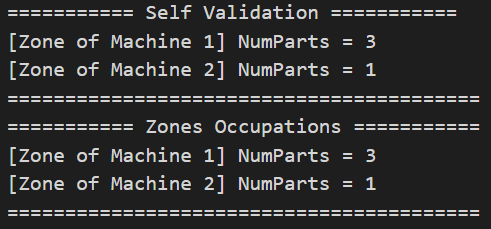

##### Running using the Digital Twin a copied database

In [33]:
digital_twin = Digital_Twin(name= "model_2stations_closed",until= 2001, initial=True )
digital_twin.run_sync()

==========  Reading the Model: model_2stations_closed  ==========
===> Big Picture
Total number of Machines: 2
Total number of Queues: 2

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [2, 1]
Capacity: 5
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Queue Lenght: 4

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 2
--Queue Out:--
Queue 1
---Process Time for quasi Trace Driven Simulation---
None
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
---Process Time for quasi Trace Driven Simulation---
None
=== matrix_ptime_qTDS ===
Machine 1: [500, 500, 500, 500]
Machine 2: [500, 500, 500]
=== matrix_ptime_TDS ===
Part

### Running for 5-s model system

In [64]:
name = "5s_parallel"
digital_twin = Digital_Twin(name= name,maxparts=5, initial=True )
digital_model = digital_twin.generate_digital_model()

#--- Initial conditions
(machines_vector, queues_vector) = digital_model.get_model_components()

#--- Create the Zones and its dictionary
zones_dict = {}
for machine in machines_vector:
    #--- Basic information from the machine
    machine_name = machine.get_name()
    machine_queues_in_list = machine.get_queue_in()

    #--- create a temp Zone object
    new_zone = Zone(machine= machine, queue_list= machine_queues_in_list)

    #--- add the Zone object in the dictionary of zones
    zones_dict[machine_name] = new_zone


#--- Run the simulation to update the database
digital_model.run()

#--- Extract Events from the database
database = Database(database_path= "databases/digital_"+ name +"_db.db", event_table= "digital_log")
full_database = database.read_store_data_all("digital_log")

#--- Find the Positioning
for event in full_database:
    #--- Extract the important informations
    (machine_name, status, queue_name) = (event[1], event[2], event[4]) 
    
    # We just care about the events with status "Finished",
    # because this in the only moment when we subtract some part from the current
    # zone and add it to the next zone

    if status == "Finished":
        # For the current zone a part was finished, so we increment the Out
        current_zone = zones_dict[machine_name]
        current_zone.addOut()

        #--- Discovery in which zone the part was putted based on the queues and machines
        for key in zones_dict:
            #--- For every zone in the zone dictionary
            zone = zones_dict[key]

            #--- For every queue of a Zone
            for queue in zone.get_queue_list():

                #--- Found a zone if the selected next queue
                if queue.get_name() == queue_name:
                    next_zone = zone
                
        #--- For the next zone, increment the In since we're adding a part to that zone
        next_zone.addIn()

#--- Running Self Validation
print("=========== Self Validation ===========")
for key in zones_dict:
    current_zone = zones_dict[key]
    zone_NumParts = current_zone.self_validation()
print("=========================================")


#--- Print the Zones Occupation
print("=========== Zones Occupations ===========")
for key in zones_dict:
    current_zone = zones_dict[key]
    zone_NumParts = current_zone.calculate_parts()
    print(f"[{current_zone.get_name()}] NumParts = {zone_NumParts}")
print("=========================================")



==========  Reading the Model: 5s_parallel  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 6

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 2
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [2, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: [3, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0
----------------
Queue 6
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Parts stored: Part 5
Part Processes for Trace Driven Simulation: None
Queue Lenght: 5

===>Detailed view of Machines:
----------------
> Machine 1
--

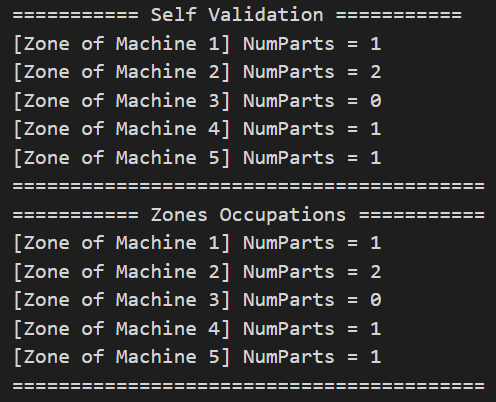

Running Digital Twin

In [34]:
digital_twin = Digital_Twin(name= "5s_parallel",maxparts=5, initial=True )
digital_twin.run_sync()

==========  Reading the Model: 5s_parallel  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 6

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 2
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [2, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: [3, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0
----------------
Queue 6
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Parts stored: Part 5
Part Processes for Trace Driven Simulation: None
Queue Lenght: 5

===>Detailed view of Machines:
----------------
> Machine 1
--

### Running for 5-s model system (linear situation)

In [65]:
name = "5s_parallel_linear"
digital_twin = Digital_Twin(name= name,maxparts=5, initial=True )
digital_model = digital_twin.generate_digital_model()

#--- Initial conditions
(machines_vector, queues_vector) = digital_model.get_model_components()

#--- Create the Zones and its dictionary
zones_dict = {}
for machine in machines_vector:
    #--- Basic information from the machine
    machine_name = machine.get_name()
    machine_queues_in_list = machine.get_queue_in()

    #--- create a temp Zone object
    new_zone = Zone(machine= machine, queue_list= machine_queues_in_list)

    #--- add the Zone object in the dictionary of zones
    zones_dict[machine_name] = new_zone


#--- Run the simulation to update the database
digital_model.run()

#--- Extract Events from the database
database = Database(database_path= "databases/digital_"+ name +"_db.db", event_table= "digital_log")
full_database = database.read_store_data_all("digital_log")

#--- Find the Positioning
for event in full_database:
    #--- Extract the important informations
    (machine_name, status, queue_name) = (event[1], event[2], event[4]) 
    
    # We just care about the events with status "Finished",
    # because this in the only moment when we subtract some part from the current
    # zone and add it to the next zone

    if status == "Finished":
        # For the current zone a part was finished, so we increment the Out
        current_zone = zones_dict[machine_name]
        current_zone.addOut()

        #--- Discovery in which zone the part was putted based on the queues and machines
        for key in zones_dict:
            #--- For every zone in the zone dictionary
            zone = zones_dict[key]

            #--- For every queue of a Zone
            for queue in zone.get_queue_list():

                #--- Found a zone if the selected next queue
                if queue.get_name() == queue_name:
                    next_zone = zone
                
        #--- For the next zone, increment the In since we're adding a part to that zone
        next_zone.addIn()

#--- Running Self Validation
print("=========== Self Validation ===========")
for key in zones_dict:
    current_zone = zones_dict[key]
    zone_NumParts = current_zone.self_validation()
print("=========================================")


#--- Print the Zones Occupation
print("=========== Zones Occupations ===========")
for key in zones_dict:
    current_zone = zones_dict[key]
    zone_NumParts = current_zone.calculate_parts()
    print(f"[{current_zone.get_name()}] NumParts = {zone_NumParts}")
print("=========================================")



==========  Reading the Model: 5s_parallel_linear  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 6

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [2, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: [3, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0
----------------
Queue 6
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Parts stored: Part 5
Part Processes for Trace Driven Simulation: None
Queue Lenght: 5

===>Detailed view of Machines:
----------------
> Mach

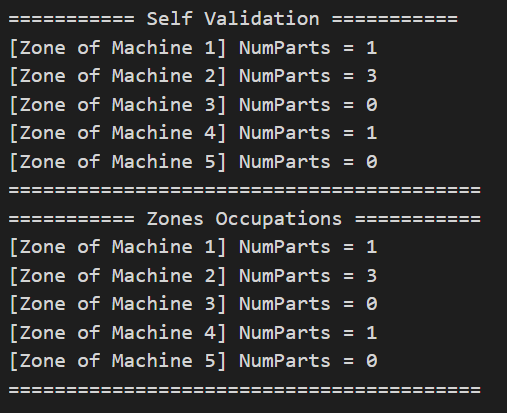

In [35]:
name = "5s_parallel_linear"
digital_twin = Digital_Twin(name= name,maxparts=5, initial=True )
digital_twin.run_sync()

==========  Reading the Model: 5s_parallel_linear  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 6

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [2, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: [3, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0
----------------
Queue 6
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Parts stored: Part 5
Part Processes for Trace Driven Simulation: None
Queue Lenght: 5

===>Detailed view of Machines:
----------------
> Mach

## Testing Allocation

Create a digital database and transform it in a real database

==========  Reading the Model: 5s_allocation  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 6

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 2
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [2, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: [3, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0
----------------
Queue 6
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Parts stored: Part 5
Part Processes for Trace Driven Simulation: None
Queue Lenght: 5

===>Detailed view of Machines:
----------------
> Machine 1


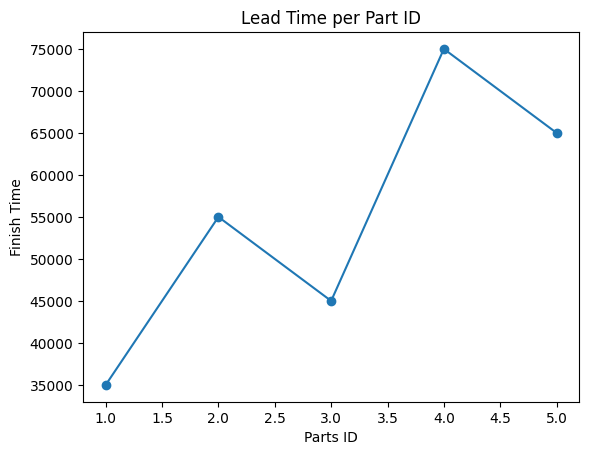

- Maximum Cycle Time: 75001
- Minimum Cycle Time: 35000
>>> Average system cycle time: 55000.8 [time unit]***


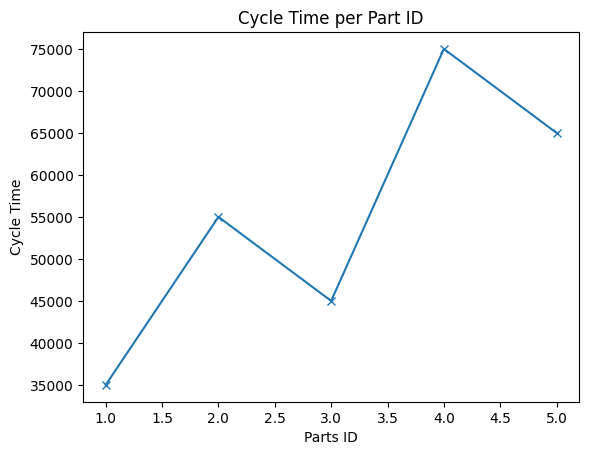

>>> System Throughput: 6.666577778962947e-05 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [40]:
name = "5s_allocation"
digital_twin = Digital_Twin(name= name,maxparts=5, initial=True )
digital_twin.run_digital_model()

In [41]:
digital_twin.run_sync()

==========  Reading the Model: 5s_allocation  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 6

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 2
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [2, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: [3, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0
----------------
Queue 6
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Parts stored: Part 5
Part Processes for Trace Driven Simulation: None
Queue Lenght: 5

===>Detailed view of Machines:
----------------
> Machine 1


Adding Model.json file

In [15]:
import json
model_path = "models/5s_allocation.json"
with open(model_path, 'r+') as model_file:
    data = json.load(model_file)
    data['initial'][0] = 1

    # Move the file pointer to the beginning of the file
    model_file.seek(0)

    # Write the modified data back to the file
    json.dump(data, model_file)

    # Truncate any remaining data in the file
    model_file.truncate()

**Important** At the moment we didn't added parts that were in the machines when the simulation stopped, just the parts that were in queues. It's important to notice that the order of the queues in the json files is not the same as the zones capacity, because a zone if formed by the machine and the PREVIOUS queue!

## Testing aligment of working machines
Testing with the aligment correctly replace parts within the working machine

create the digital twin

In [29]:
name = "5s_merging_sync"
digital_twin = Digital_Twin(name= name,maxparts=10)

Generate the model and run a normal simulation

==========  Reading the Model: 5s_merging_sync  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Queue Lenght: 4
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
---Process Time for quasi Trace Driven Simulation---
None
----------------
> Machine 2
-

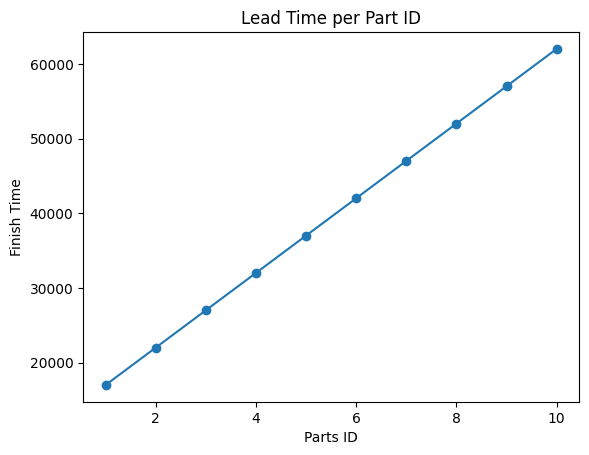

- Maximum Cycle Time: 32001
- Minimum Cycle Time: 17000
>>> Average system cycle time: 21800.4 [time unit]***


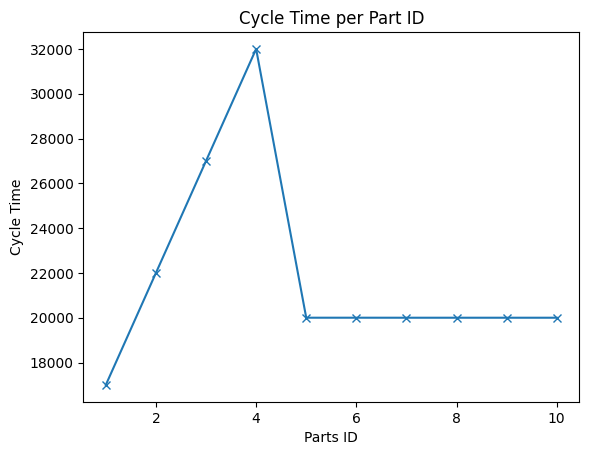

>>> System Throughput: 0.00016128772116578765 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [30]:
digital_twin.generate_digital_model()
digital_twin.run_digital_model()

Copy the existing digital database and change it for real. After that run the validation

In [31]:
digital_twin.run_validation()

==========  Reading the Model: 5s_merging_sync  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Queue Lenght: 4
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
---Process Time for quasi Trace Driven Simulation---
None
----------------
> Machine 2
-

Run Synchronization

In [32]:
digital_twin.run_sync()

==========  Reading the Model: 5s_merging_sync  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Queue Lenght: 4
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
---Process Time for quasi Trace Driven Simulation---
None
----------------
> Machine 2
-

(First updated the model for the digital twin)

With the updated model and replaced parts, run again the simulation to see the impact of the sync:

==========  Reading the Model: 5s_merging_sync  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Queue Lenght: 1
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
---Process Time for quasi Trace Driven Simulation---
None
--- Part already being processed: Part 2 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
---Process Time for quasi Trace Driven Simulation---
None
----------------
> Machine 3
--Queue In:--
Queue 3
--Queue Out:

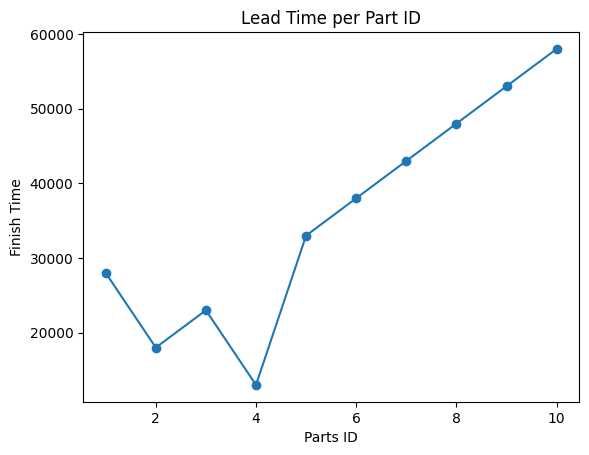

- Maximum Cycle Time: 27999
- Minimum Cycle Time: 14999
>>> Average system cycle time: 20799.8 [time unit]***


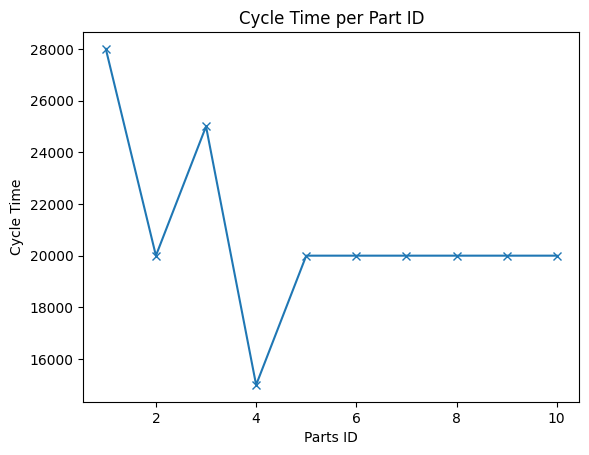

>>> System Throughput: 0.000172416765806307 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [33]:
digital_twin.generate_digital_model()
digital_twin.run_digital_model()

Copy and past the digital database and change it to real. Run Validation again

In [34]:
digital_twin.run_validation()

==========  Reading the Model: 5s_merging_sync  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Queue Lenght: 1
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
---Process Time for quasi Trace Driven Simulation---
None
--- Part already being processed: Part 2 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
---Process Time for quasi Trace Driven Simulation---
None
----------------
> Machine 3
--Queue In:--
Queue 3
--Queue Out:

TypeError: 'NoneType' object is not subscriptable